In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import r2_score



/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
GS = "/Users/davidhoffman/desktop/stocks_download/GS_2006-01-01_to_2018-01-01.csv"
df = pd.read_csv(GS, index_col="Date", parse_dates=True)

In [4]:
#Only keep closing price of the day
df.drop(['Open','High','Low'], axis = 1, inplace = True)
df.drop(['Name'], axis = 1, inplace = True)
df.drop(['Volume'], axis = 1, inplace = True)

In [5]:
df['close_diff_1']=df.Close.diff()

In [6]:
train = df.Close[:-31]
test = df.Close[len(train):]
train_diff = train.diff()

In [42]:
#AR model
ar1 = ARMA(train.dropna().values, (1, 0)).fit()
ar1_diff = ARMA(train_diff.dropna().values, (1, 0)).fit()

#ARIMA model

ar1ma1 = ARIMA(train.dropna().values, (1,1,1), freq ="D").fit()
ar1ma1_diff = ARIMA(train.dropna().values, (1,1,1), freq="D").fit()

/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [48]:
#Predictions out of sample


predictions_ar = ar1.predict(start=len(train),end=len(train)+31)

predictions_ar_diff = ar1_diff.predict(start=len(train),end=len(train)+31)
full_pred_ar_diff = train[len(train)-1]+np.cumsum(predictions_ar_diff)

predictions_ar1ma1 = ar1ma1.predict(start=len(train),end=len(train)+31)
full_pred_ar_ar1ma1 = train[len(train)-1]+np.cumsum(predictions_ar1ma1)

predictions_ar1ma1_diff = ar1ma1_diff.predict(start=len(train),end=len(train)+31)
full_pred_ar1ma1_diff = train[len(train)-1]+np.cumsum(predictions_ar1ma1_diff)


/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


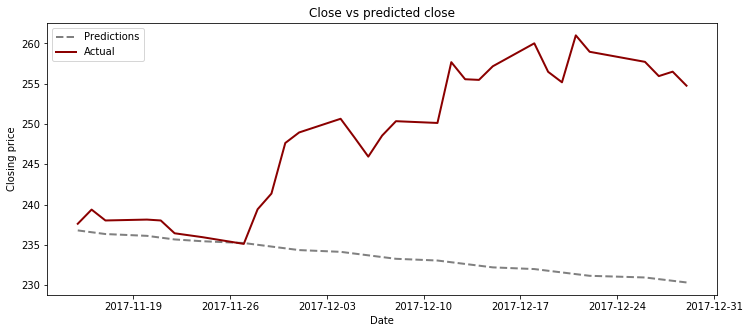

In [49]:
#Actual close price vs predictions_ar, out of sample

fig, ax = plt.subplots(figsize=(12,5))
date_ticks = test.index
ax.plot(date_ticks, predictions_ar[1:], lw=2, color='grey', ls='dashed', label = 'Predictions')
ax.plot(date_ticks, test, lw=2, color='darkred', label = 'Actual')
plt.xlabel("Date")
plt.ylabel("Closing price")
plt.title("Close vs predicted close")
plt.legend()
plt.show();

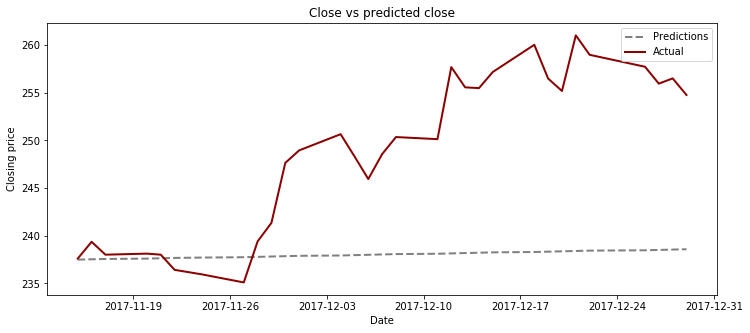

In [50]:
#Actual close price vs full_pred_ar_diff, out of sample

fig, ax = plt.subplots(figsize=(12,5))
date_ticks = test.index
ax.plot(date_ticks, full_pred_ar_diff[2:], lw=2, color='grey', ls='dashed', label = 'Predictions')
ax.plot(date_ticks, test, lw=2, color='darkred', label = 'Actual')
plt.xlabel("Date")
plt.ylabel("Closing price")
plt.title("Close vs predicted close")
plt.legend()
plt.show()

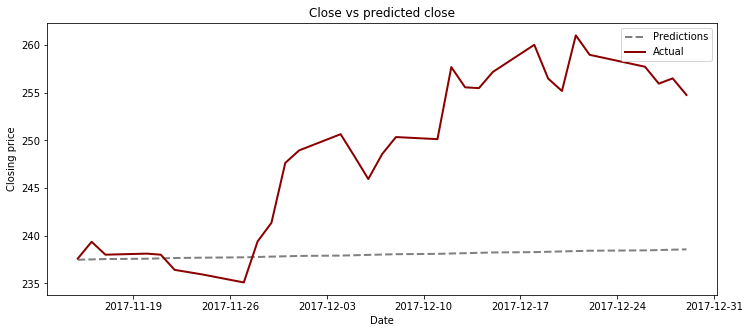

In [51]:
#Actual close price vs full_pred_ar_ar1ma1, out of sample

fig, ax = plt.subplots(figsize=(12,5))
date_ticks = test.index
ax.plot(date_ticks, full_pred_ar_ar1ma1[1:], lw=2, color='grey', ls='dashed', label = 'Predictions')
ax.plot(date_ticks, test, lw=2, color='darkred', label = 'Actual')
plt.xlabel("Date")
plt.ylabel("Closing price")
plt.title("Close vs predicted close")
plt.legend()
plt.show();

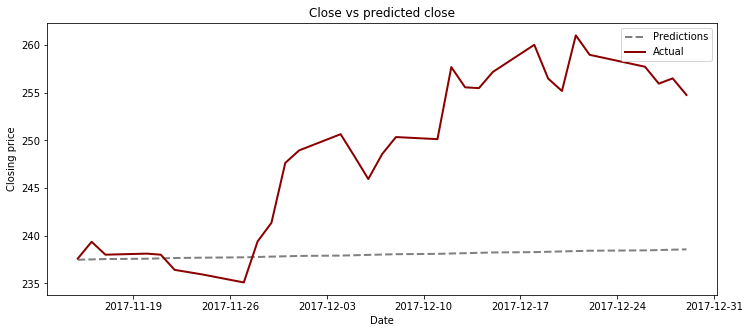

In [52]:
#Actual close price vs full_pred_ar1ma1_diff, out of sample

fig, ax = plt.subplots(figsize=(12,5))
date_ticks = test.index
ax.plot(date_ticks, full_pred_ar1ma1_diff[1:], lw=2, color='grey', ls='dashed', label = 'Predictions')
ax.plot(date_ticks, test, lw=2, color='darkred', label = 'Actual')
plt.xlabel("Date")
plt.ylabel("Closing price")
plt.title("Close vs predicted close")
plt.legend()
plt.show()